# Studies on dp counter error

## Theoretical error
For $T_{max}$ the maximum length of stay in the hospital, for any $T \in \mathbb{N}$ the length of the observation, for any $q \in Q$ the set of states, $\mathcal{B}_q$ in algorithm 2 run with
parameters $T, T_{max}, \epsilon / |Q|, \beta > 0$, yields a $(T, 4 \log(1/\beta) \cdot \log^{2.5} T_{max} /(\epsilon/|Q|), \beta)$
counter enjoying $\epsilon / |Q|$-differential pan-privacy against a single
unannounced intrusion.

/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5
/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5
/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5


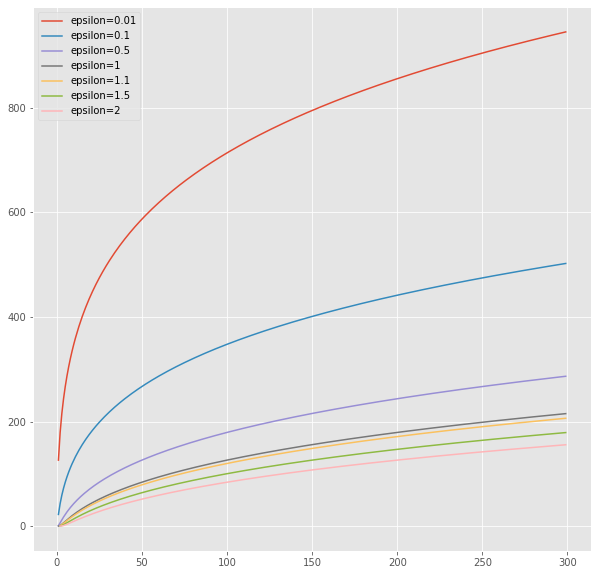

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

def add_error(t, epsilon=0.1, beta=0.5):
    return 4*np.log(1/beta)*np.log(t/epsilon)**2.5

x_range = np.arange(1, 300, 1)
epsilon_range = [0.01, 0.1, 0.5, 1, 1.1, 1.5, 2]

plt.figure(figsize=(10, 10))
for epsilon in epsilon_range:
    plt.plot(x_range, [add_error(x, epsilon=epsilon) for x in x_range],
            label=f'epsilon={epsilon}')
plt.legend()
plt.show()

In [2]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(beta):
    x_range = np.arange(1, 300, 1)
    epsilon_range = [0.01, 0.1, 0.5, 1, 1.1, 1.5, 2]

    plt.figure(figsize=(10, 10))
    for epsilon in epsilon_range:
        plt.plot(x_range, [add_error(x, epsilon=epsilon, beta=beta) for x in x_range],
                label=f'epsilon={epsilon}')
    plt.legend()
    plt.show()

interactive_plot = interactive(f, beta=(0.1, 0.9, 0.1))
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.9, min=0.1), Output()), _dom_classes=('…

## Empirical error

Error computed thanks to synthetic data emulating entries and exits of patients in a hospital (see create_dataset.py).

In [3]:
import numpy as np
import pandas as pd
from create_dataset import run_hospital, units
from dp_counter import dp_counter_process
from utils import stream_item_reader
from itertools import accumulate

In [4]:
units

['examination_unit', 'ic', 'surgery', 'ward', 'exit', 'reception']

In [4]:
run_time = 600
epsilon_range = [0.01, 0.1, 0.5, 1, 1.1, 1.5, 2]
t_max_range = [10, 20, 50, 100, 200, 300]
results = {'T_max': [],
           'epsilon': [],
           'stream': [],
           'mse': []
          }

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

for t_max in t_max_range:
    streams,_ = run_hospital(run_time, t_max)
    for epsilon in epsilon_range:
        for stream in units:
            dp_cum_sum = dp_counter_process(streams[stream], epsilon, t_max)
            cum_sum = [0] + list(accumulate([stream_item_reader(i) for i in streams['ic']][:-1]))
            ind_tmax = (1 + np.arange(len(cum_sum)//t_max)) * t_max
            error = mse(np.array(cum_sum)[ind_tmax], np.array(dp_cum_sum)[ind_tmax])
            
            results['T_max'].append(t_max)
            results['epsilon'].append(epsilon)
            results['stream'].append(stream)
            results['mse'].append(error)

/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5
/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5
/tmp/ipykernel_440721/2408750517.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return 4*np.log(1/beta)*np.log(t/epsilon)**2.5


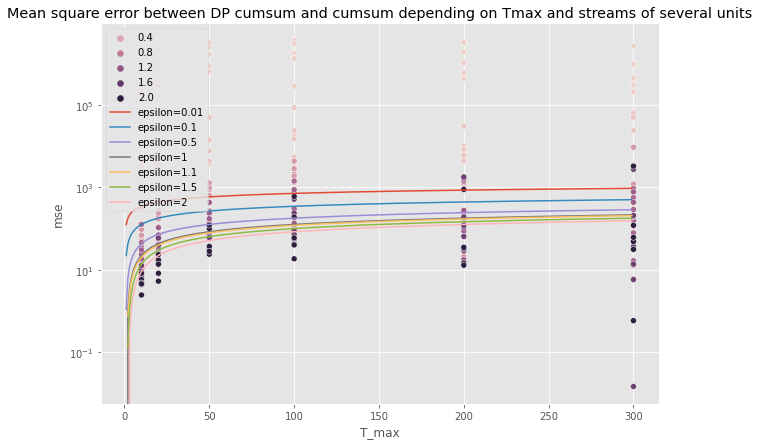

In [7]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd
df_plot = pd.DataFrame(results)

plt.figure(figsize=(10, 7))
ax = sns.scatterplot(x="T_max", y="mse", hue="epsilon", data=df_plot)

for epsilon in epsilon_range:
    plt.plot(x_range, [add_error(x, epsilon=epsilon) for x in x_range],
            label=f'epsilon={epsilon}')
plt.yscale('log')
plt.legend()
plt.title('Mean square error between DP cumsum and cumsum depending on Tmax and streams of several units')
plt.show()